In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
def sliding_window(array, n):
    margen = int((n-1)/2)
    row, col = array.shape
    out = array.copy()
    for i in range(margen, row -  margen):
        for j in range(margen, col -  margen):
            # print(out[i-margen:i+margen+1, j-margen:j+margen+1])
            common = np.argmax(np.bincount(array[i-margen:i+margen+1, j-margen:j+margen+1].flat))
            # print(common, sep='\n')
            out[i,j] = common
    return out

In [3]:
def segmented(array_seg, array_pred, labels):
    uniques = np.unique(array_seg)
    out = array_pred.copy().reshape(-1)
    for n in range(1, labels + 1):
        index = np.where(array_seg.flat==n)[0]
        common = np.argmax(np.bincount(out[index]))
        out[index] = common
    return out.reshape(array_seg.shape)
    

In [4]:
# print("Precisión Pavia :",metrics.accuracy_score(y_pred_pa, pavia_y_test))
def confussion(array_test, array_pred, title):
    # It is neccesary to delete the zeros in both images because it is noise 
    intersected = np.intersect1d(np.where(array_test.flat!=0)[0], np.where(array_pred.flat!=0)[0])
    print("Precisión :",metrics.accuracy_score(array_test.reshape(-1)[intersected], array_pred.reshape(-1)[intersected]))
    confu_out = confusion_matrix(array_test.reshape(-1)[intersected], array_pred.reshape(-1)[intersected])
    confu_out = np.round(confu_out/confu_out.max(), 2)
    uniques_test = np.unique(array_test.reshape(-1)[intersected])
    uniques_pred = np.unique(array_pred.reshape(-1)[intersected])
    if all(uniques_test == uniques_pred):
        df_cm = pd.DataFrame(confu_out, columns=uniques_test, index=uniques_pred)
        plt.figure(figsize=(10, 8))
        sn.set(font_scale=0.8) # for label size
        sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size": 12}) # font size
        plt.title(title)
        plt.show()
    else:
        print("error with the labels, pred and test don't share same labels")

## Problem 1

In [5]:
pavia = np.load('Classification_pavia.npy')
pavia_obtained = np.load('Classification_obtained_pavia.npy')
indian = np.load('classification_indian.npy')
indian_obtained = np.load('classification_obtained_indian.npy')

### Pavia

In [6]:
windows_3_3_pa = sliding_window(pavia_obtained, 3)
windows_5_5_pa = sliding_window(pavia_obtained, 5)
windows_9_9_pa = sliding_window(pavia_obtained, 9)

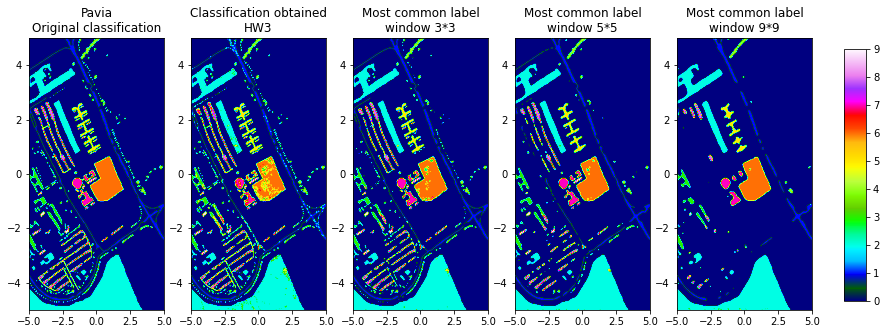

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
im0 = axes[0].imshow(pavia, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx0 = axes[0].set_title("Pavia\nOriginal classification")
im1 = axes[1].imshow(pavia_obtained, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx1 = axes[1].set_title("Classification obtained\nHW3")
im2 = axes[2].imshow(windows_3_3_pa, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx2 = axes[2].set_title("Most common label\nwindow 3*3")
im3 = axes[3].imshow(windows_5_5_pa, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx3 = axes[3].set_title("Most common label\nwindow 5*5")
im4 = axes[4].imshow(windows_9_9_pa, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx4 = axes[4].set_title("Most common label\nwindow 9*9")
# add space for colour bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
bar = fig.colorbar(im4, cax=cbar_ax)

Precisión : 0.9483121376472788


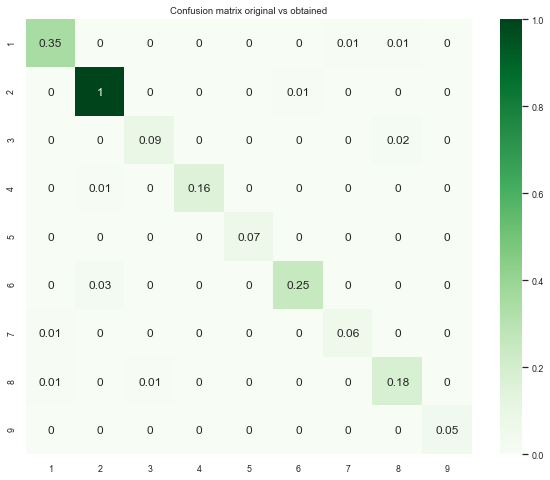

In [8]:
confussion(pavia, pavia_obtained, 'Confusion matrix original vs obtained')

Precisión : 0.9827548141788299


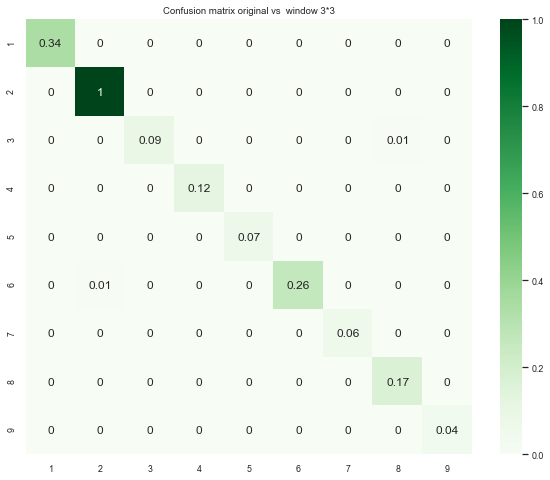

In [9]:
confussion(pavia, windows_3_3_pa, 'Confusion matrix original vs  window 3*3')

Precisión : 0.9908430775802232


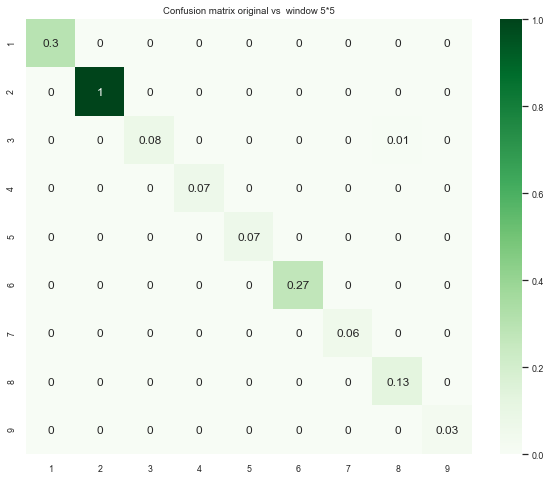

In [10]:
confussion(pavia, windows_5_5_pa, 'Confusion matrix original vs  window 5*5')

Precisión : 0.9953180854765746


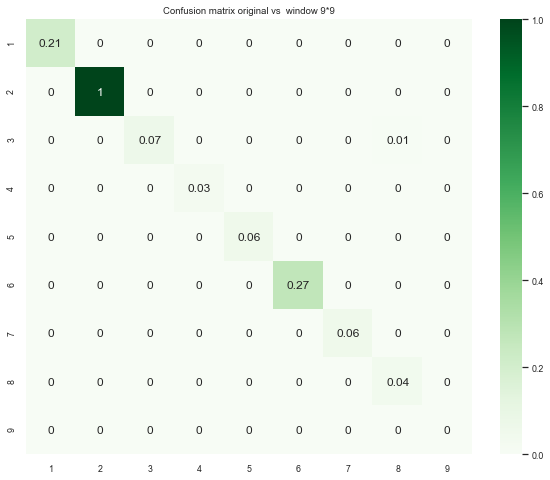

In [11]:
confussion(pavia, windows_9_9_pa, 'Confusion matrix original vs  window 9*9')

### Indian

In [12]:
windows_3_3_in = sliding_window(indian_obtained, 3)
windows_5_5_in = sliding_window(indian_obtained, 5)
windows_9_9_in = sliding_window(indian_obtained, 9)

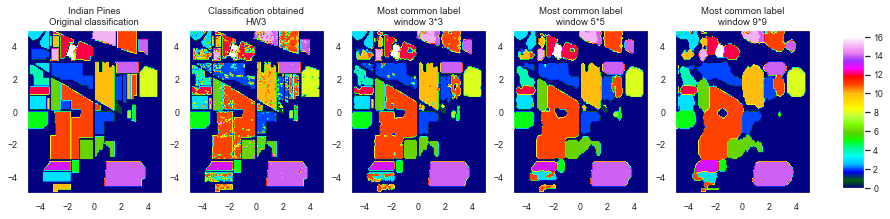

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
im0 = axes[0].imshow(indian, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx0 = axes[0].set_title("Indian Pines\nOriginal classification")
axes[0].grid(False)
im1 = axes[1].imshow(indian_obtained, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx1 = axes[1].set_title("Classification obtained\nHW3")
axes[1].grid(False)
im2 = axes[2].imshow(windows_3_3_in, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx2 = axes[2].set_title("Most common label\nwindow 3*3")
axes[2].grid(False)
im3 = axes[3].imshow(windows_5_5_in, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx3 = axes[3].set_title("Most common label\nwindow 5*5")
axes[3].grid(False)
im4 = axes[4].imshow(windows_9_9_in, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx4 = axes[4].set_title("Most common label\nwindow 9*9")
axes[4].grid(False)
# add space for colour bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
bar = fig.colorbar(im4, cax=cbar_ax)

Precisión : 0.8284710703483267


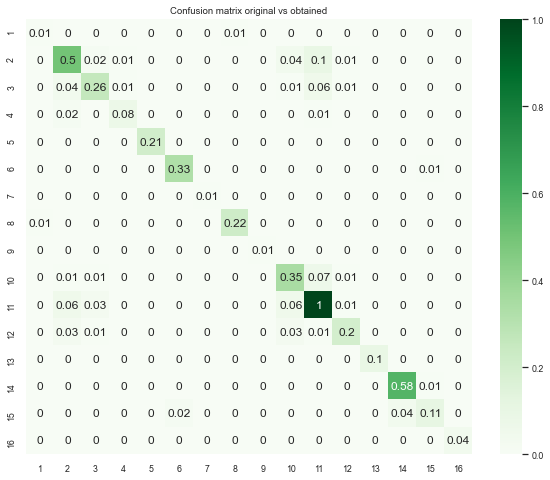

In [14]:
confussion(indian, indian_obtained, 'Confusion matrix original vs obtained')

Precisión : 0.9162551440329219


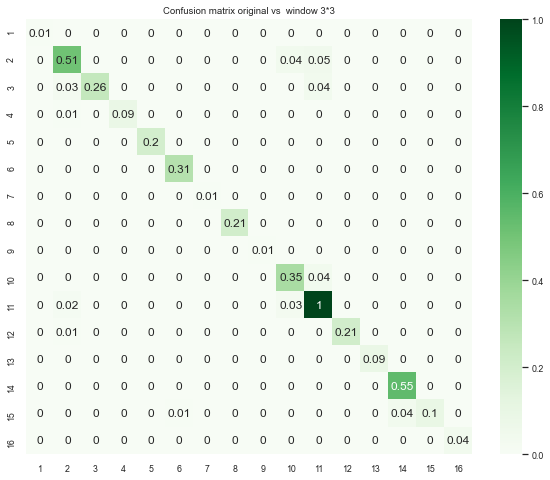

In [15]:
confussion(indian, windows_3_3_in, 'Confusion matrix original vs  window 3*3')

Precisión : 0.9372486772486772


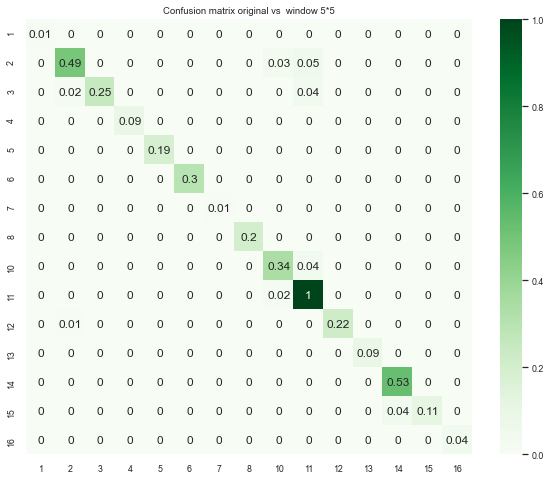

In [16]:
confussion(indian, windows_5_5_in, 'Confusion matrix original vs  window 5*5')

Precisión : 0.9397643920871305


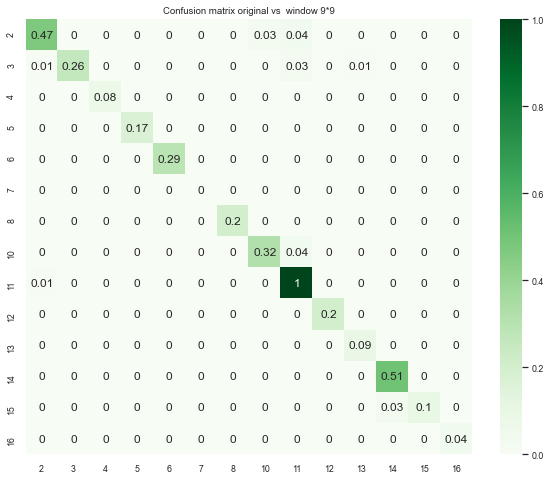

In [17]:
confussion(indian, windows_9_9_in, 'Confusion matrix original vs  window 9*9')

## Problem 2

In [18]:
indian_pca = np.load(r'Indian_1pca_0_68_varianza.npy')
# varianza de la 1ra componente principal = 0.68
pavia_pca = np.load(r'Pavia_1pca_0_58_varianza.npy')
# varianza de la 1ra componente principal = 0.58

In [19]:
labels=16
seg_ind = np.digitize(indian_pca, bins=np.linspace(indian_pca.min(), indian_pca.max(), labels))

(-0.5, 144.5, 144.5, -0.5)

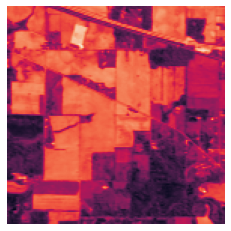

In [20]:
bars = plt.imshow(indian_pca)
plt.grid(False)
plt.axis('off')

(-0.5, 144.5, 144.5, -0.5)

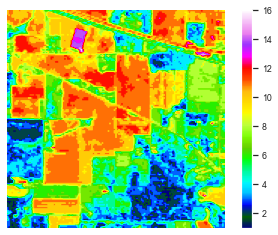

In [21]:
bars = plt.imshow(seg_ind, cmap='gist_ncar')
plt.grid(False)
color_bar = plt.colorbar(bars)
plt.axis('off')

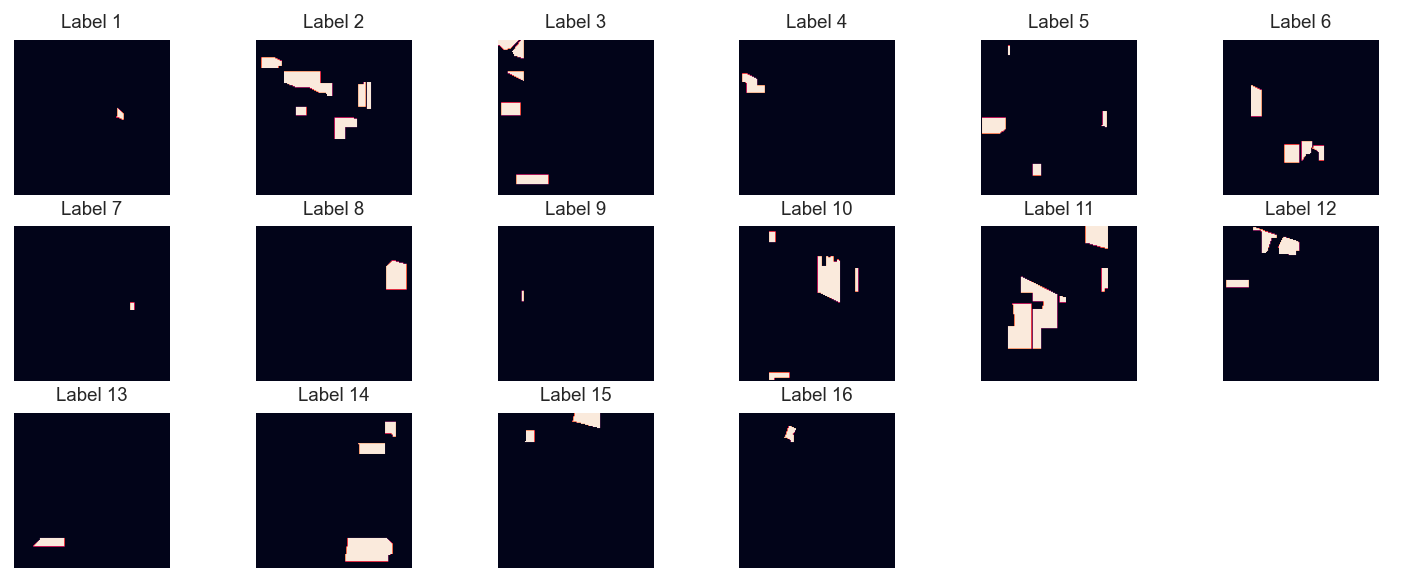

In [22]:
rows, cols = 3, 6
fig, ax = plt.subplots(rows, cols, figsize = (13,5), dpi = 140)
n = 1
for i in range(rows):
    for j in range(cols):
        if n <= 16:
            ax[i, j].imshow(np.where(indian==n,1, 0))
            ax[i, j].set_title(f"Label {n}")
        ax[i, j].grid(False)
        ax[i, j].axis('off')
        n+=1
plt.show()

In [23]:
labels=9
seg_pav = np.digitize(pavia_pca, bins=np.linspace(pavia_pca.min(), pavia_pca.max(), labels))

(-0.5, 339.5, 609.5, -0.5)

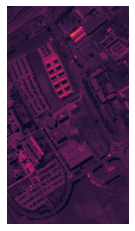

In [24]:
bars = plt.imshow(pavia_pca)
plt.grid(False)
plt.axis('off')

(-0.5, 339.5, 609.5, -0.5)

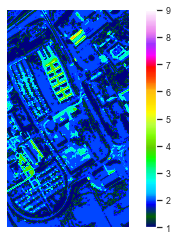

In [25]:
bars = plt.imshow(seg_pav, cmap='gist_ncar')
plt.grid(False)
color_bar = plt.colorbar(bars)
plt.axis('off')

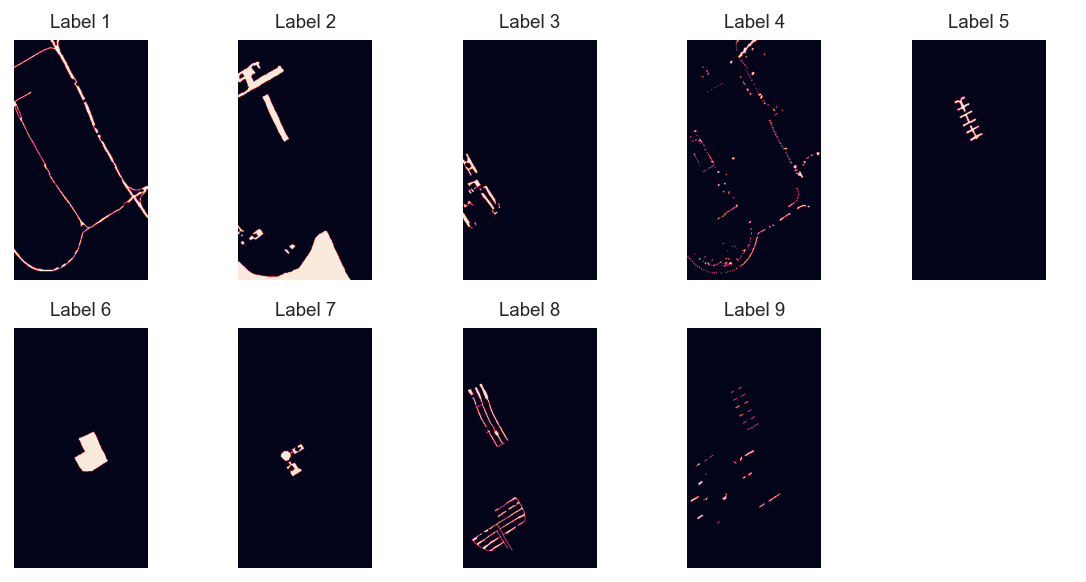

In [26]:
rows, cols = 2, 5
fig, ax = plt.subplots(rows, cols, figsize = (10, 5), dpi = 140)
n = 1
for i in range(rows):
    for j in range(cols):
        if n <= labels:
            ax[i, j].imshow(np.where(pavia==n,1, 0))
            ax[i, j].set_title(f"Label {n}")
        ax[i, j].grid(False)
        ax[i, j].axis('off')
        n+=1
plt.show()

In [27]:
segmented_indian = segmented(indian, indian_obtained, 16)

In [28]:
segmented_pavia = segmented(pavia, pavia_obtained, 9)

Precisión : 1.0


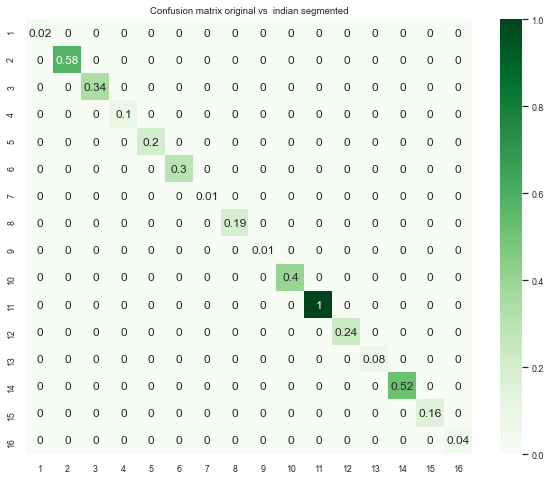

In [29]:
confussion(indian, segmented_indian, 'Confusion matrix original vs  indian segmented')

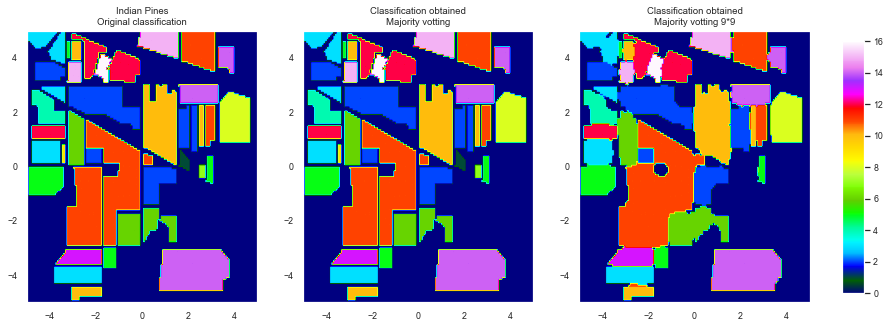

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
im0 = axes[0].imshow(indian, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx0 = axes[0].set_title("Indian Pines\nOriginal classification")
axes[0].grid(False)
im1 = axes[1].imshow(segmented(indian, indian_obtained, 16), extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx1 = axes[1].set_title("Classification obtained\nMajority votting")
axes[1].grid(False)
im2 = axes[2].imshow(segmented(indian, windows_9_9_in, 16), extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx2 = axes[2].set_title("Classification obtained\nMajority votting 9*9")
axes[2].grid(False)
# add space for colour bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
bar = fig.colorbar(im2, cax=cbar_ax)

Precisión : 1.0


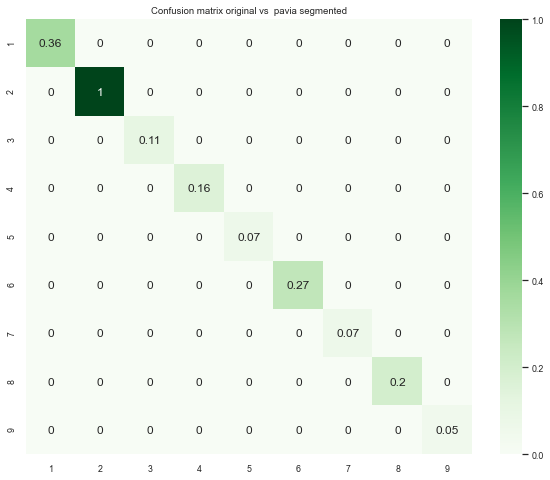

In [31]:
confussion(pavia, segmented_pavia, 'Confusion matrix original vs  pavia segmented')

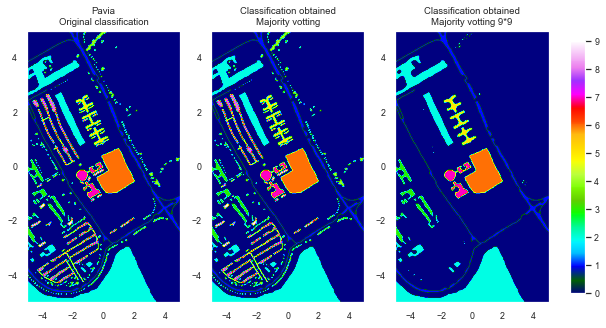

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
im0 = axes[0].imshow(pavia, extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx0 = axes[0].set_title("Pavia\nOriginal classification")
axes[0].grid(False)
im1 = axes[1].imshow(segmented(pavia, pavia_obtained, 9), extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx1 = axes[1].set_title("Classification obtained\nMajority votting")
axes[1].grid(False)
im2 = axes[2].imshow(segmented(pavia, windows_9_9_pa, 9), extent=(-5,5,-5,5), aspect='auto', cmap='gist_ncar')
tx2 = axes[2].set_title("Classification obtained\nMajority votting 9*9")
axes[2].grid(False)
# add space for colour bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
bar = fig.colorbar(im2, cax=cbar_ax)